# RSI Strategy Demonstration Notebook
This notebook demonstrates the functionality of the `RSI_Strategy` class, which extends the `Strategies` class to implement a trading strategy based on the Relative Strength Index (RSI) and Moving Average Convergence Divergence (MACD) indicators.

We will:
- Explain the key methods of the `RSI_Strategy` class.
- Use the class to fetch stock data, calculate indicators, and execute trading logic.
- Visualize the results.

### Prerequisites
Before running this notebook, ensure you have:
- An Alpaca API account.
- Installed the necessary libraries (`alpaca-trade-api`, `matplotlib`, `pandas`).

In [13]:
from strategies.RSI_Strategy import RSI_Strategy
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Replace with your Alpaca API credentials
API_KEY = 'your_api_key_here'
SECRET_KEY = 'your_secret_key_here'


In [14]:
# Initialize the RSI_Strategy class
rsi_strategy = RSI_Strategy(API_KEY, SECRET_KEY)
print('RSI_Strategy class initialized successfully.')

RSI_Strategy class initialized successfully.


## Relative Strength Index (RSI)
The RSI is a momentum oscillator that measures the speed and change of price movements.
It ranges from 0 to 100 and is used to identify overbought or oversold conditions.

In [15]:
# Example: Calculate RSI on sample data
from datetime import timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=30)

data = rsi_strategy.get_stock_data("QQQ", "Day", start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))

# Calculate RSI
data['RSI'] = rsi_strategy.rsi(data['close'])
data.tail()

,close,high,low,trade_count,open,volume,vwap,RSI
timestamp,,,,,,,,
2024-12-27 05:00:00+00:00,522.55,526.320,517.905,4659,526.070,489143,521.322974,47.493036
2024-12-30 05:00:00+00:00,515.57,519.300,511.920,4814,515.460,395727,515.864776,45.833333
2024-12-31 05:00:00+00:00,511.23,517.660,510.260,4261,516.950,355308,512.439471,44.474745
2025-01-02 05:00:00+00:00,510.33,516.590,505.710,5394,514.230,442507,511.049540,37.064873
2025-01-03 05:00:00+00:00,518.54,519.645,512.620,4248,513.295,486069,517.768775,44.956059


## Moving Average Convergence Divergence (MACD)
The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

In [16]:
# Example: Calculate MACD on sample data
data['MACD'], data['Signal'] = rsi_strategy.macd(data)
print(data[['close', 'MACD', 'Signal']])

                            close      MACD    Signal
timestamp                                            
2024-12-06 05:00:00+00:00  526.51  0.000000  0.000000
2024-12-09 05:00:00+00:00  522.39 -0.328661 -0.065732
2024-12-10 05:00:00+00:00  520.55 -0.729194 -0.198425
2024-12-11 05:00:00+00:00  529.95 -0.284835 -0.215707
2024-12-12 05:00:00+00:00  526.69 -0.193501 -0.211265
2024-12-13 05:00:00+00:00  530.44  0.179408 -0.133131
2024-12-16 05:00:00+00:00  538.19  1.087761  0.111048
2024-12-17 05:00:00+00:00  535.81  1.597181  0.408274
2024-12-18 05:00:00+00:00  516.60  0.445675  0.415754
2024-12-19 05:00:00+00:00  514.18 -0.654628  0.201678
2024-12-20 05:00:00+00:00  518.62 -1.155042 -0.069666
2024-12-23 05:00:00+00:00  517.84 -1.596163 -0.374965
2024-12-24 05:00:00+00:00  530.01 -0.952754 -0.490523
2024-12-26 05:00:00+00:00  529.60 -0.470508 -0.486520
2024-12-27 05:00:00+00:00  522.55 -0.649712 -0.519158
2024-12-30 05:00:00+00:00  515.57 -1.339518 -0.683230
2024-12-31 05:00:00+00:00  5

## Risk Management
The `RSI_Strategy` class includes methods to calculate position sizes based on risk tolerance and to determine trade entry and exit points.

In [17]:
# Example: Calculate position size
symbol = 'AAPL'  # Replace with a valid stock symbol
position_size = rsi_strategy.calculate_position_size(symbol, rsi_strategy.RISK_PERCENTAGE, rsi_strategy.STOP_LOSS_PERCENTAGE)
print(f'Calculated position size for {symbol}: {position_size}')

Calculated position size for AAPL: 0


## Visualization
The `plot_data` method visualizes closing prices, RSI, and MACD with buy and sell signals.

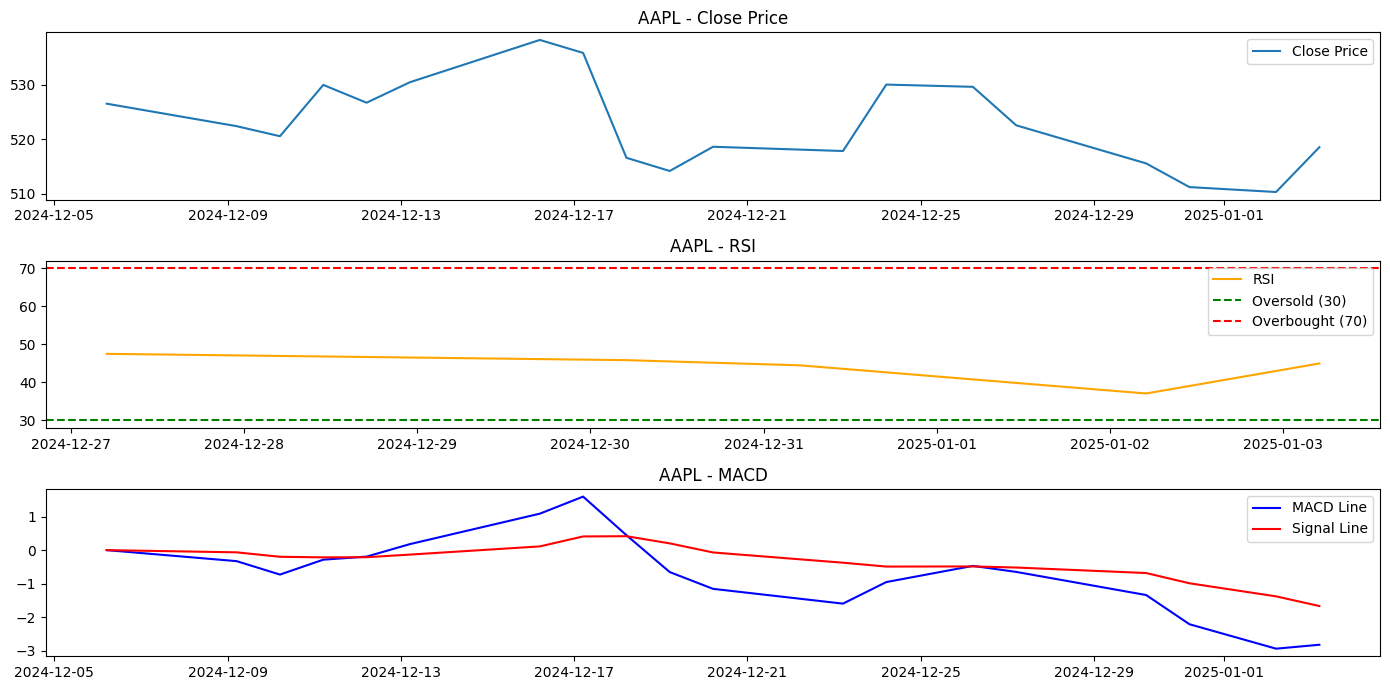

In [18]:
# Example: Plot sample data
rsi_strategy.plot_data(data, symbol='AAPL')

## Full Trading Workflow
Use the `trade` method to fetch data, calculate indicators, and execute trading logic.

Current RSI for AAPL: 44.036222509702434
Current MACD for AAPL: 3.1689647289937
Current Signal for AAPL: 4.82044634906188
Current position in AAPL: 0 shares
Calculated position size: 0 shares


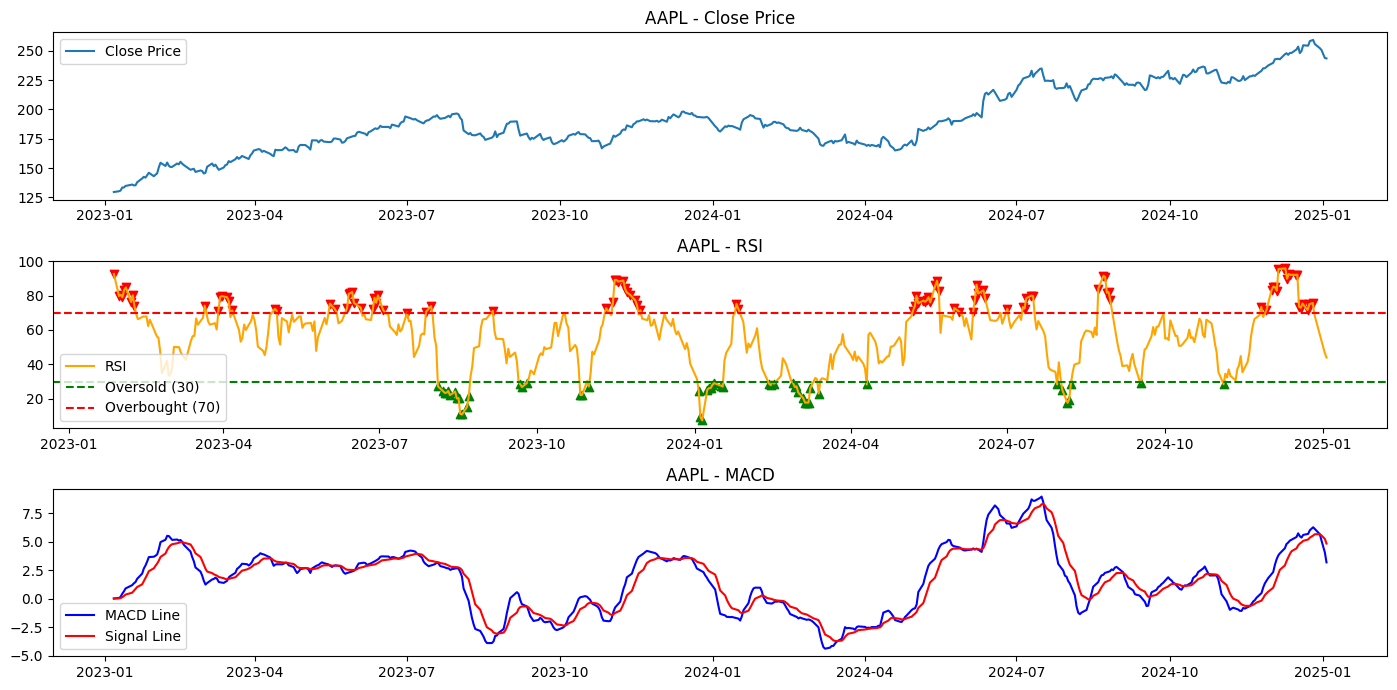

Current RSI for AAPL: 44.036222509702434
Current MACD for AAPL: 3.1689647289937
Current Signal for AAPL: 4.82044634906188
Holding AAPL: No trading conditions met. (RSI: 44.036222509702434, MACD: 3.1689647289937)


In [11]:
# Example: Execute trading logic
rsi_strategy.trade(symbol='AAPL', qty=10)